# 비슷한 연예인 사진 찾기

In [107]:
import face_recognition
import os
import numpy as np
from PIL import Image
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/승희.jpeg' 
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/embed/' 
   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [108]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    %matplotlib inline
    import matplotlib.pyplot as plt
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [109]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/'
image_file = os.path.join(dir_path, '나.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(len(embedding[0]))

128


In [110]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    a = 0
    for file in file_list:
        image_file = os.path.join(dir_path,file)
        print(file)
        face = get_gropped_face(image_file)
        embedimg = Image.fromarray(face)
        embedimg.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg' )
        embedding = get_face_embedding(face)
        if len(embedding) != 0:
           embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        a += 1
        # print(file)
        print(a)
        # if len(embedding) != 0:
        #     embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [111]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [112]:
embedding_dict = get_face_embedding_dict(dir_path)



잇지예지.jpeg
1
정수빈.jpg
2
슬리피.jpg
3
찬열.jpeg
4
슈가.jpg
5
이광수.jpg
6
biden.jpg
7
유지태.jpg
8
제이크 질렌할.jpeg
9
제이홉.jpg
10
나.jpg
11
제프리 힌턴.jpg
12
이경규.jpeg
13
도아.jpeg
14
아린.jpg
15
이준혁.jpeg
16
이성민.jpg
17
대도서관.jpeg
18
이대형.jpg
19
박정민.jpg
20
김학범.jpg
21
김C.jpeg
22
이천수.jpg
23
잇섭.jpg
24
아이즈원조유리.jpeg
25
수호.jpg
26
이동국.jpeg
27
지수.jpg
28
장원준.jpeg
29
최양락.jpg
30
문별.jpg
31
장원영.jpeg
32
크리스 햄스워스.jpg
33
박재범.jpg
34
개리.jpg
35
김희철.jpg
36
비니.jpg
37
박찬욱.jpeg
38
디오.jpeg
39
온앤오프효진.jpg
40
켄 정.jpeg
41
나인뮤지스경리.jpg
42
전소미.jpg
43
레인보우재경.jpg
44
태양.jpeg
45
박나래.jpeg
46
카이.jpg
47
러블리즈지수.jpeg
48
잇지유나.jpg
49
성시경.jpg
50
노무현.jpeg
51
민니.jpg
52
미미.jpg
53
문재인.jpeg
54
박진영.jpg
55
제이콥 배털론.jpg
56
슬기.jpg
57
하정우.jpg
58
류진.jpg
59
박해일.jpeg
60
김래원.jpeg
61
노홍철.jpeg
62
박항서.jpg
63
지민(BTS).jpg
64
여자아이들수진.jpeg
65
이희준.jpg
66
김민재.jpeg
67
RM.jpg
68
홍구.jpg
69
옥냥이.jpeg
70
주호민.jpeg
71
방시혁.jpeg
72
케이.jpg
73
딕헌터.jpeg
74
이종석.jpeg
75
도지한.jpg
76
성룡.jpg
77
서현진.jpg
78
길.jpg
79
화사.jpg
80
트와이스모모.jpeg
81
우기.jpg
82
이제훈.jpeg
83
조이.jpg
84
첸.jpg
85
신비.jpg
86
숀 코네리.jpg
87
이

In [9]:
get_distance('승희','길')

0.6740029586392219

In [113]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [114]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}),거리({})'.format(i,
                                               sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))
            
            ims = Image.open(path_to_save + sorted_faces[i][0])
            plt.imshow(ims)
            plt.axis('off')
            plt.show()

순위 1 : 이름(b1a4진영),거리(0.37487418310920817)


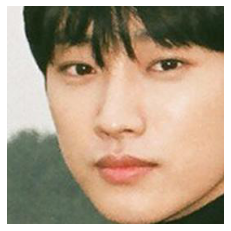

순위 2 : 이름(디오),거리(0.42550481097628995)


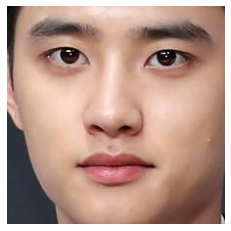

순위 3 : 이름(찬열),거리(0.4310098111515525)


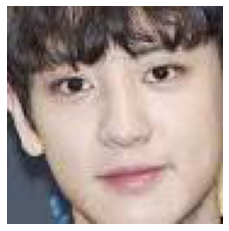

순위 4 : 이름(진),거리(0.4399198676850506)


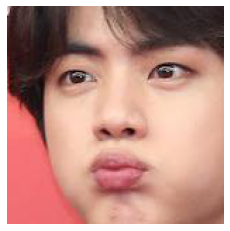

순위 5 : 이름(손호준),거리(0.4450687297721655)


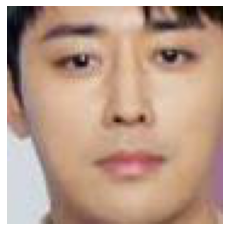

In [124]:
get_nearest_face('나')